# Статистика, DS-поток
## Практическое задание 2


**Правила:**

* Дедлайн **20 сентября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 &mdash;  2 балла
* Задача 2 &mdash;  2 балла
* Задача 3 &mdash;  5 баллов
* Задача 4 &mdash; 15 баллов

**Важность задач:**

* *высокая:* задачи 1, 2, 3;
* *обычная:* задача 4.

In [97]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

sns.set(font_scale=1.5, palette='Set2')

---

## Задача 1. 


**1.** Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** $X_{(n)}$ - смещенная, $\frac{n + 1}{n} X_{(n)}$ - несмещенная, $2\overline{X}$ - несмещенная.

Проведите практическое исследование несмещенности перечисленных оценок аналогично ислледованию несмещенности выборочной дисперсии в предыдущих заданиях. Разбор этой задачи для выборочной дисперсии был на лекции.

**Решение:**

Рассмотрим $\theta = 1$.

In [50]:
def estimate_1(X):
    return X.max(axis=-1)

def estimate_2(X):
    return ((len(X[0]) + 1) / len(X[0])) * X.max(axis=-1)

def estimate_3(X):
    return 2 * X.mean(axis=-1)

In [51]:
estimators = [
    (estimate_1, "$X_{(n)}$", "red", 0.0),
    (estimate_2, "$\\frac{n+1}{n}X_{(n)}$", "green", 0.1),
    (estimate_3, "$2\overline{X}$", "blue", 0.2)
]

In [52]:
def est_plot(theta, estimators, sample_size, sample_count):  
    '''
    Построение графика разброса реализаций оценок и их средних значений.
    
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''    

    X = sps.uniform(loc=0, scale=theta).rvs(size=(sample_count, sample_size))
    
    plt.figure(figsize=(18, 0.7 * len(estimators)))
    for estimator, name, color, y in estimators:
        E = estimator(X)

        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((0.6, 1.4))
    plt.ylim((-0.1, 0.1 * len(estimators)))

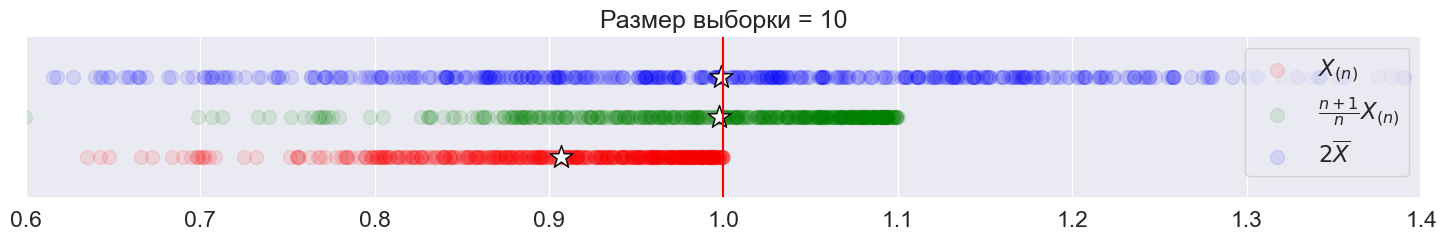

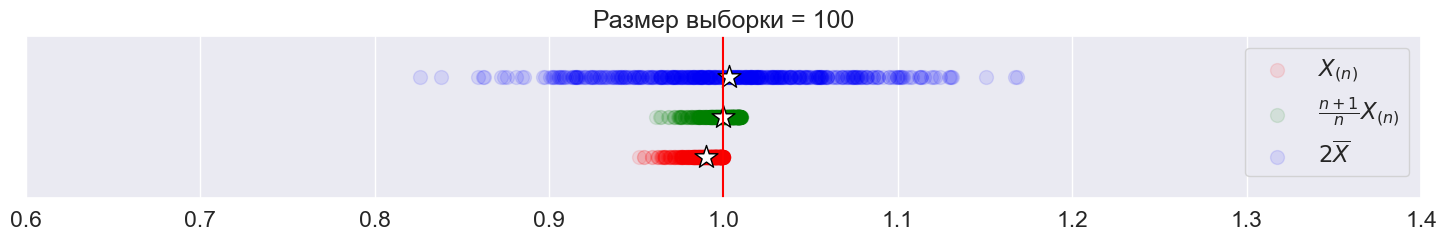

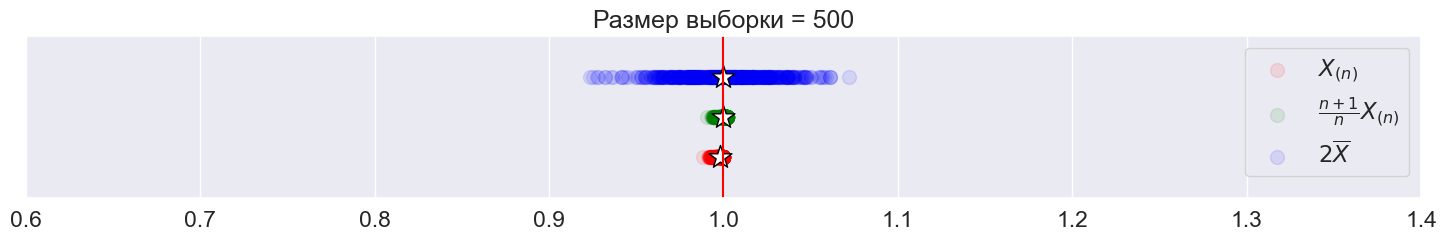

In [55]:
sample_size_list = (10, 100, 500)  # размеры выборок
sample_count = 500  # количество экспериментов
theta = 1

for sample_size in sample_size_list:
    est_plot(theta, estimators, sample_size, sample_count)

**Вывод:** На графиках видно, что несмещенные оценки в среднем более приближены к истинному значению параметра, чем смещеннная оценка. Также видно, что смещение уменьшается с ростом размера выборки, то есть она является асимптотически несмещенной.

---
## Задача 2.

Пусть $X_1, \ldots, X_n$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки $S^2$ дисперсии $\sigma^2$. 

Примеры кода можно посмотреть в материалах лекций. Обязательно на графике оценок визуализируйте границы, которые задает свойство асимптотической нормальности.

**Решение:**

In [93]:
sigma = 1  # истинное значение параметра
size = 300  # размер выборок
samples_count = 500  # количество выборок
n_range = (np.arange(size) + 1)  # размеры подвыборок

# генерируем множество выборок
samples = sps.norm.rvs(size=(samples_count, size))
# вычисляем оценки в зависимости от размера выборки, 
estimation = (samples**2).cumsum(axis=-1) / n_range - (samples.cumsum(axis=-1) / n_range)**2

Визуализируем для каждой выборки все оценки в зависимости от размера выборки.

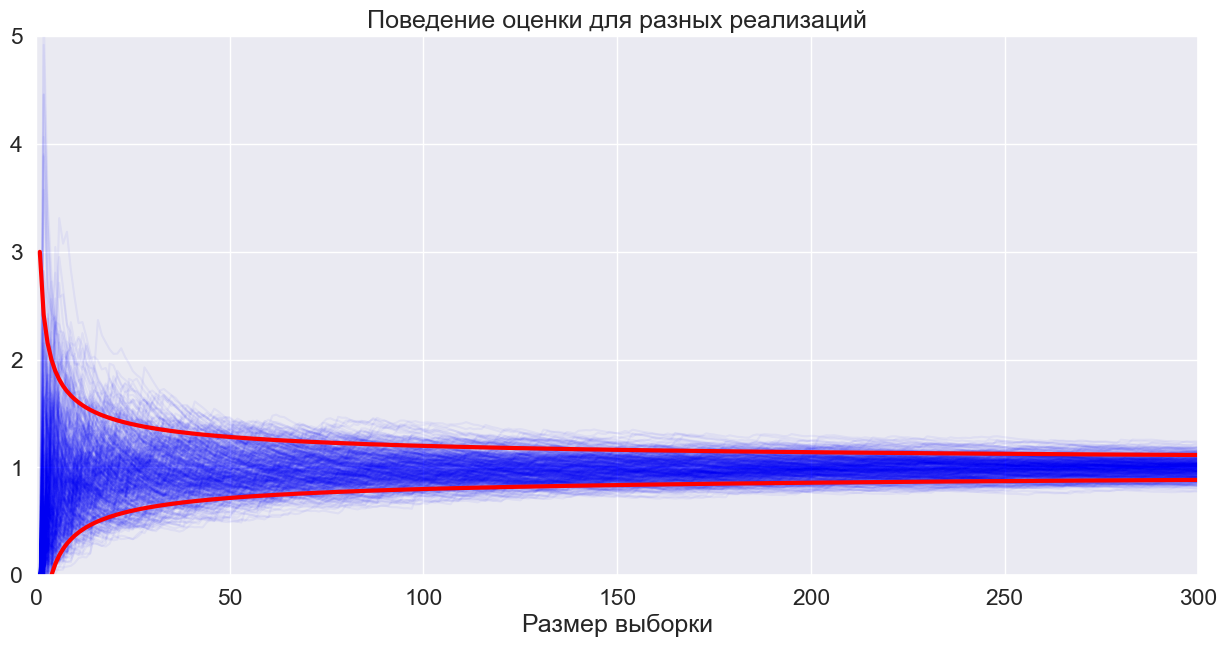

In [102]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, estimation[i], color='blue', alpha=0.05)
plt.plot(n_range, sigma + 2*sigma/np.sqrt(n_range), color='red', lw=3)
plt.plot(n_range, sigma - 2*sigma/np.sqrt(n_range), color='red', lw=3)
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 5))
plt.xlim((0, size));

На графике видно, что во первых, с ростом размера выборки траектории оценок сходятся к истинному значению параметра, об этом говорит свойство состоятельности. Во вторых, по свойству асимптотической нормальности с вероятностью около 0.95 при больших размерах выборки значение оценки отклоняется от истинного значения параметра не более чем на $2\sigma\left/\sqrt{n}\right.$, что также видно на графике.

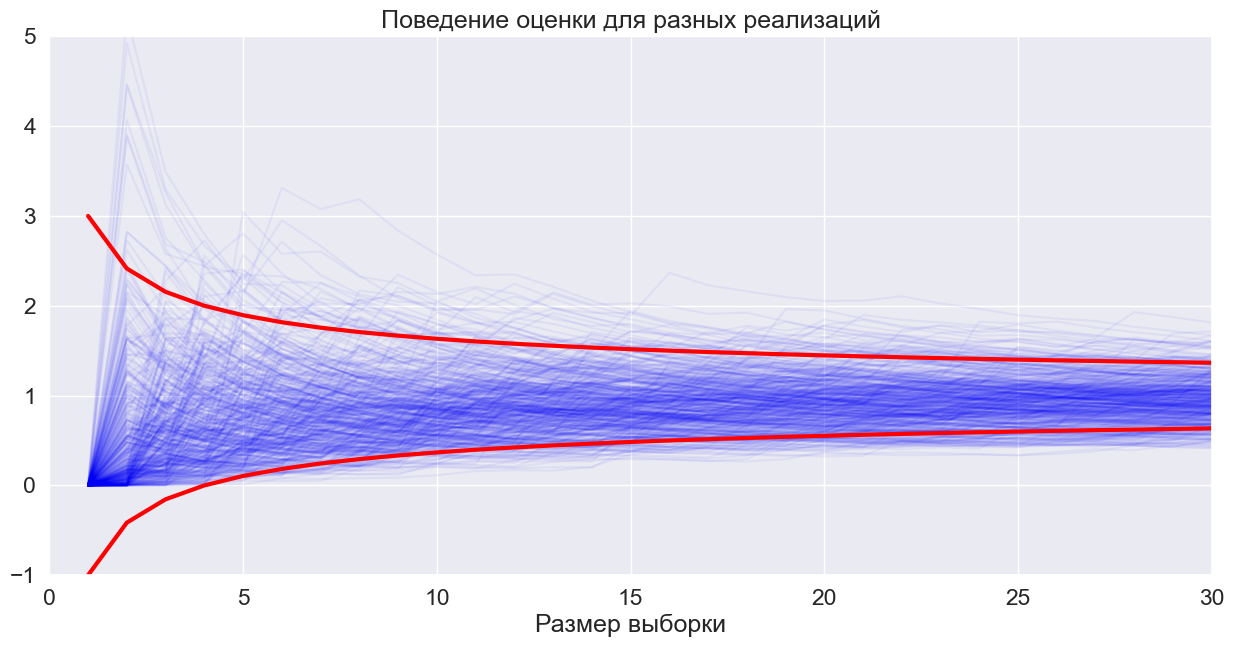

In [101]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, estimation[i], color='blue', alpha=0.05)
plt.plot(n_range, sigma + 2*sigma/np.sqrt(n_range), color='red', lw=3)
plt.plot(n_range, sigma - 2*sigma/np.sqrt(n_range), color='red', lw=3)
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((-1, 5))
plt.xlim((0, 30));

На графике видно, что при малых размерах выборки асимтотические свойства не выполняются. Приближения начинают выполняться начиная с размера выборки 25-30.

Посмотрим также, как себя ведут величины 
$$Z_n = \sqrt{n}\frac{\widehat{\theta} - \theta}{\theta},$$
распределение которых должно сходиться к стандартному нормальному.

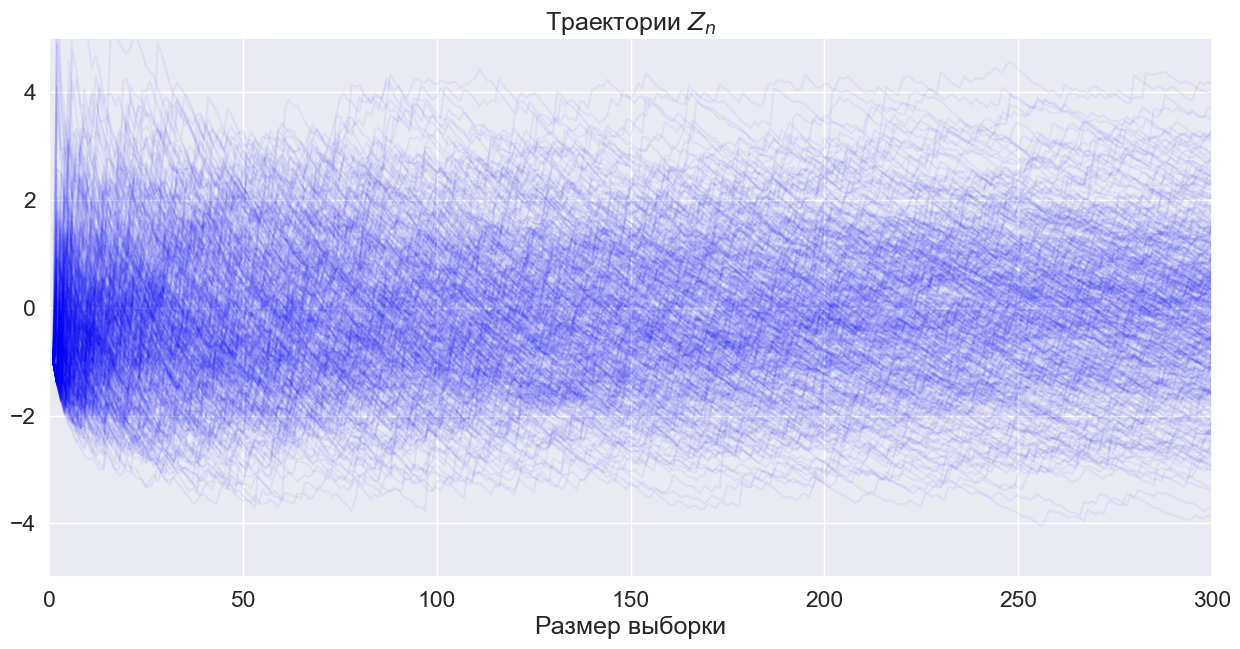

In [103]:
Zn = (estimation - sigma**2) * np.sqrt(n_range) / sigma**2

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, Zn[i], color='blue', alpha=0.05)
plt.title('Траектории $Z_n$')
plt.xlabel('Размер выборки')
plt.ylim((-5, 5))
plt.xlim((0, size));

На графике видно, что при больших значениях выборки распределение довольно похоже на стандартное нормальное.

Также для выборки размера 300 построим гистрограмму значений величин $Z_n$. На графике видно, что она довольно хорошо аппроксимируется стандартным нормальным распределением.

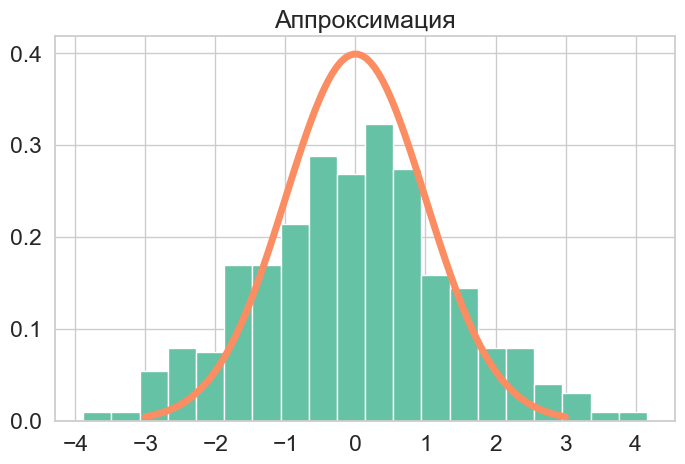

In [106]:
sns.set_style('whitegrid')
grid = np.linspace(-3, 3, 100)

plt.figure(figsize=(8, 5))
plt.hist(Zn[:, -1], bins=20, density=True)
plt.plot(grid, sps.norm.pdf(grid), lw=5)
plt.title('Аппроксимация');

**Вывод:** Мы убедились в свойствах состоятельности и асимптотической нормальности. Также оценили величину $Z_n = \sqrt{n}\frac{\widehat{\theta} - \theta}{\theta},$ распределение которой должно сходиться к стандартному нормальному, в чем мы и убедились на графиках.

___
## Задача 3.

Пусть случайная величина $X$ имеет нормальное распределение с параметрами $(a, \sigma^2)$, то есть:
$$
X \sim \mathcal{N}(a, \sigma^2)
$$
Рассмотрим следующую задачу оптимизации:
$$
f(X) = (\mathsf{E}X-1)^2 + (\mathsf{D}X - 1)^2 \longrightarrow \min_{a, \sigma^2}
$$
В данном случае правильный ответ мы можем легко найти непосредственно, однако в реальности возникают гораздо более сложные функции, и решить задачу напрямую руками не представляется возможным. Для решения таких задач применяются различные градиентные методы, такие как, например, стохастический градиентный спуск. Оказывается, что в нём критически важно использовать несмещенные оценки градиента.

*Замечание.* Если смещение заключается только в том, что математическое ожидание оценки отличается от вектора градиента домножением каждой компоненты на одну и ту же константу, то проблем нет &mdash; все равно мы используем шаг градиента.

В данной задаче вам предлагается на примере простой функции убедиться, насколько важным оказывается использовать несмещенные оценки в итерационных процедурах.

**Решение:**

Запишите оптимальные значения параметров $a$ и $\sigma^2$, а также шаг простого градиентного спуска для минимизаци определенной выше функции $f(X)$:

$f(X) = (a - 1)^2 + (\sigma^2 - 1)^2$

Эта функция неотрицательная и $f(X) = 0$ при $a = 1$ и $\sigma^2 = 1$.

Реализуйте метод простого градиентного спуска для выше описанной задачи оптимизации. Для каждой итерации сохраните текущие значения среднего и дисперсии, постройте график зависимости значений $a$ и $\sigma^2$ от шага процедуры. Наблюдается ли сходимость к оптимальным параметрам?

Шаг градиентного спуска: $x_{t + 1} = x_{t} - \eta \nabla f(x_{t})$

$\nabla f(x_{t}) = (2(a - 1), 2(\sigma^2 - 1))$

In [117]:
class GD:
    def __init__(self):
        self.counts_theta = []
        self.point = sps.uniform(loc=0, scale=5).rvs(size=2)
        
    def gradient_1(self):
        return np.array([2 * (self.point[0] - 1), 2 * (self.point[1] - 1)])
    
    def descent(self, n_it = 500, eta = 0.005, method='gradient_1'):
        for i in range(n_it):
            self.point -= eta * self.methods[method](self)
            new_point = self.point.copy()
            self.counts_theta.append(new_point)
        self.counts_theta = np.array(self.counts_theta)
        return self
    
    def gradient_2(self):
        sample = sps.norm(loc=self.point[0], scale=np.sqrt(self.point[1])).rvs(size = 5)
        return np.array([2 * (sample.mean() - 1), 2 * (sample.var() - 1)])
    
    def gradient_3(self):
        sample = sps.norm(loc=self.point[0], scale=np.sqrt(self.point[1])).rvs(size = 5)
        return np.array([2 * (sample.mean() - 1), 2 * (sample.var(ddof = 1) - 1)])
    
    methods = {
        "gradient_1": gradient_1,
        "gradient_2": gradient_2,
        "gradient_3": gradient_3
    }

In [118]:
n_it = 1000
eta = 0.005
GDesc = GD().descent(n_it=n_it, eta=eta, method='gradient_1')

In [119]:
def show(name, counts):
    fig = plt.figure(figsize=(15, 10))
    plt.plot(np.arange(n_it), counts)
    plt.axhline(y=1, color='r', linestyle='-')
    plt.xlabel('Количество итераций')
    plt.ylabel('{}'.format(name))
    plt.title('Зависимость значений {} от количетсва итераций'.format(name))
    plt.show();

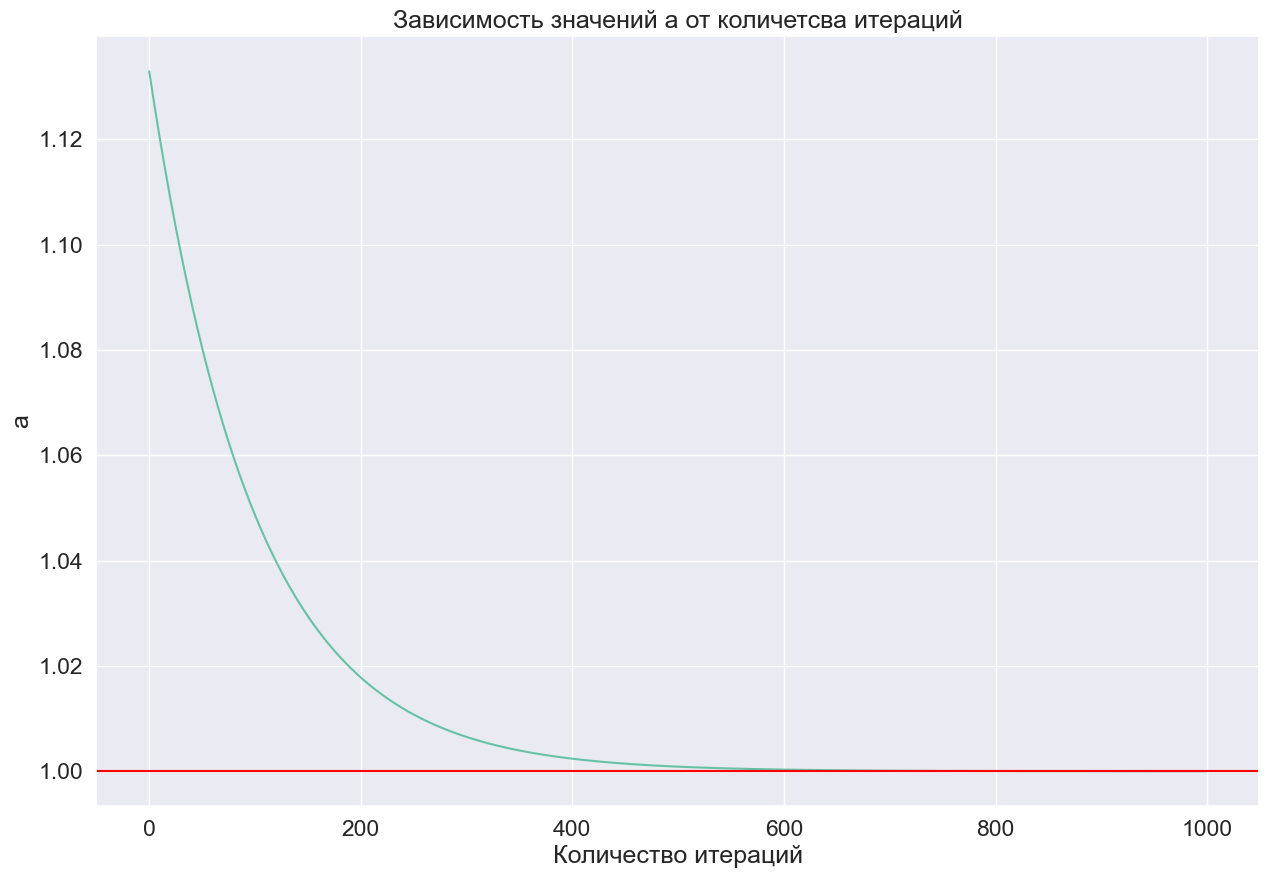

In [120]:
show('a', GDesc.counts_theta[:, 0])

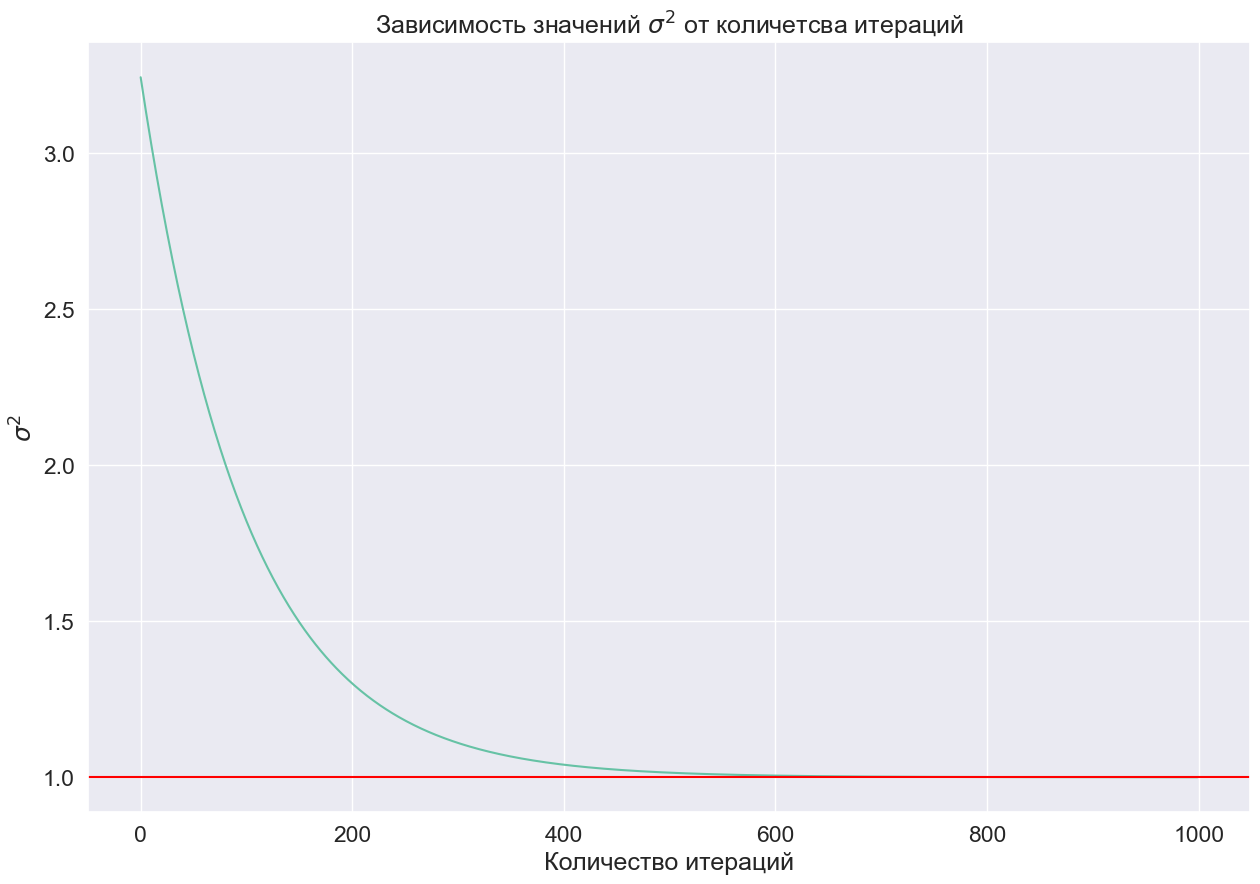

In [121]:
show('$\sigma^2$', GDesc.counts_theta[:, 1])

На графиках видно, что параметры сходятся к нужным значениям, при которых достигается минимум функции.

Теперь предположим, что мы хотим оценить градиент стохастически. Например, давайте текущие значения среднего и дисперсии оценивать изученным ранее методом Монте-Карло. А именно, каждый раз мы будем генерировать выборку размера 5 из нормального распределения с текущими значениями параметров и далее по ней оценивать градиент.
Для оценки математического ожидания ипользуйте несмещенную оценку, а для дисперсии &mdash; смещенную. 

Реализуйте описанный выше подход. Как и прежде, изобразите текущие значения параметров в зависимости от итерации. Сошлась ли такая процедура к оптимальным значениям?

In [128]:
n_it = 1000
eta = 0.005
SGDesc = GD().descent(n_it=n_it, eta=eta, method='gradient_2')

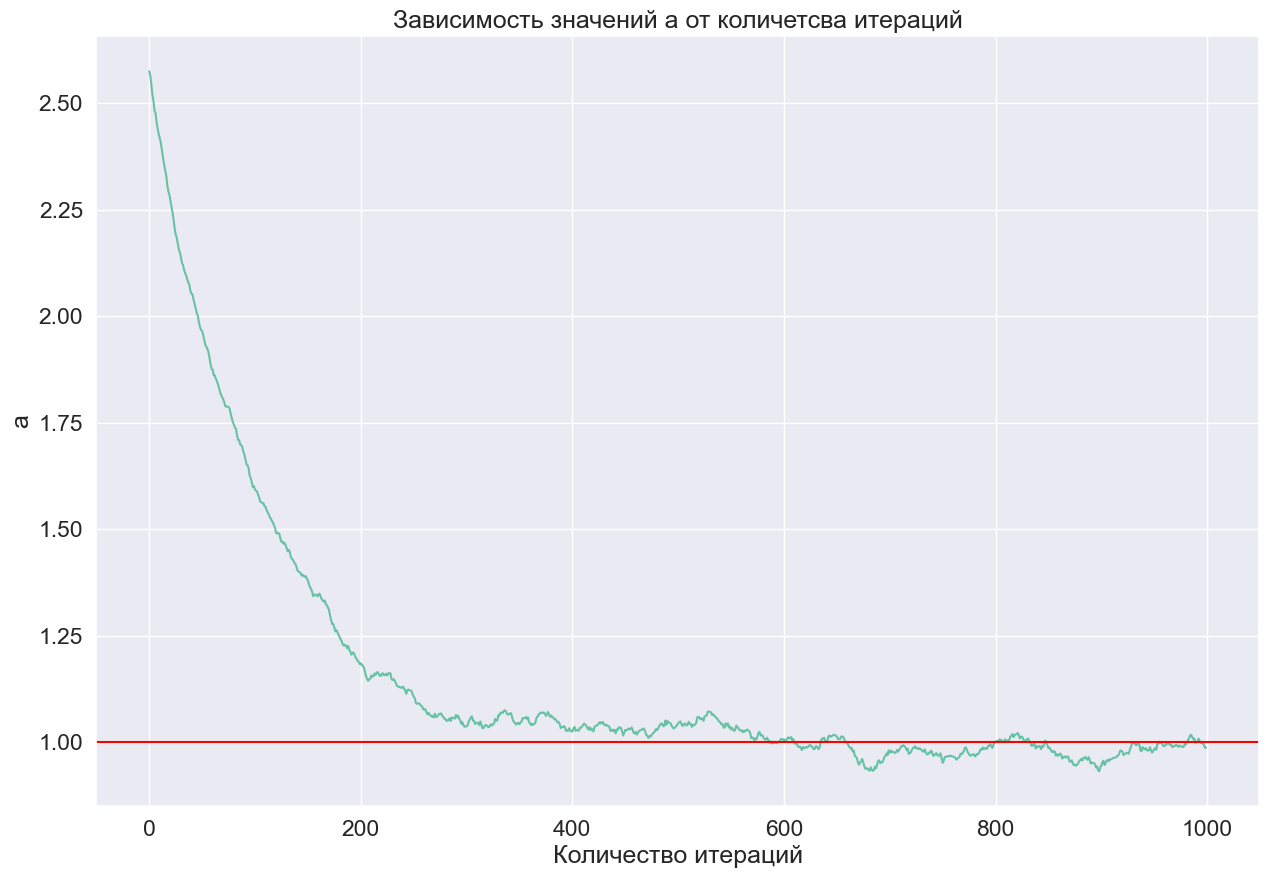

In [129]:
show('a', SGDesc.counts_theta[:, 0])

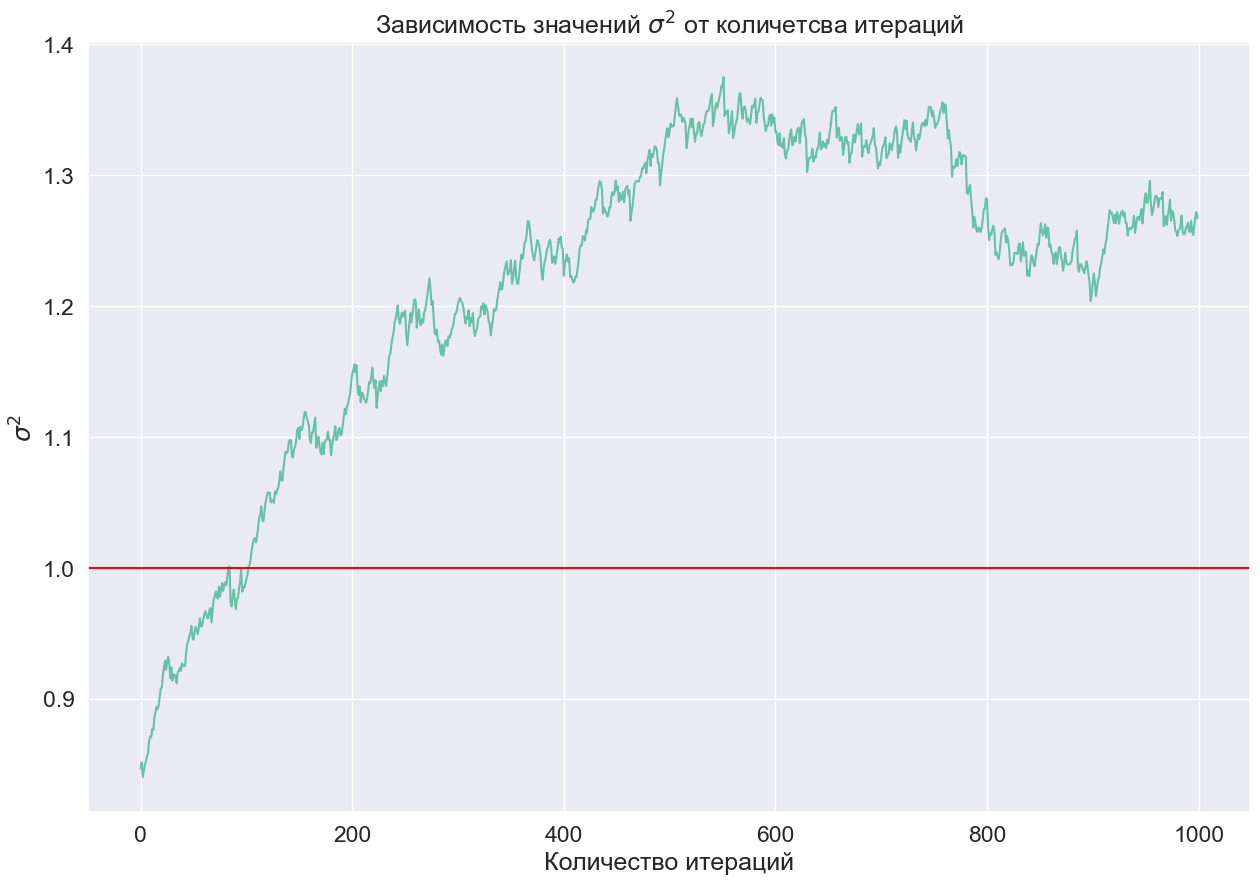

In [130]:
show('$\sigma^2$', SGDesc.counts_theta[:, 1])

На графиках видно, что оценка на $a$ более менее приближается к истинному значению, а оценка для $\sigma^2$ не сходится. Это и логично, тк мы взяли смещенную оценку на дисперсию.

Теперь изменим нашу процедуру, взяв несмещенную оценку для дисперсии. Обратите внимание на параметр `ddof` в функции `np.var`. Поменялся ли результат?

In [134]:
n_it = 1000
eta = 0.005
new_SGDesc = GD().descent(n_it=n_it, eta=eta, method='gradient_3')

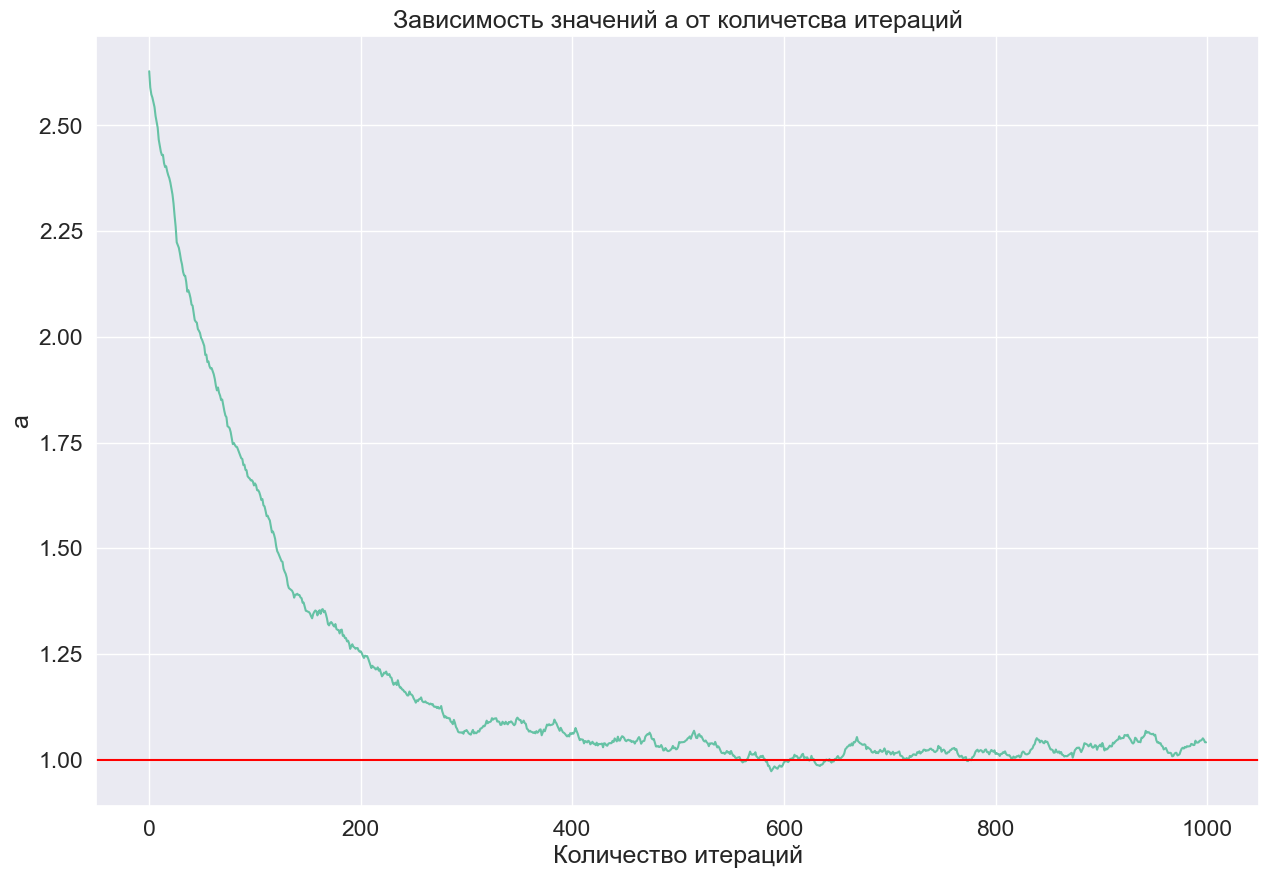

In [135]:
show('a', new_SGDesc.counts_theta[:, 0])

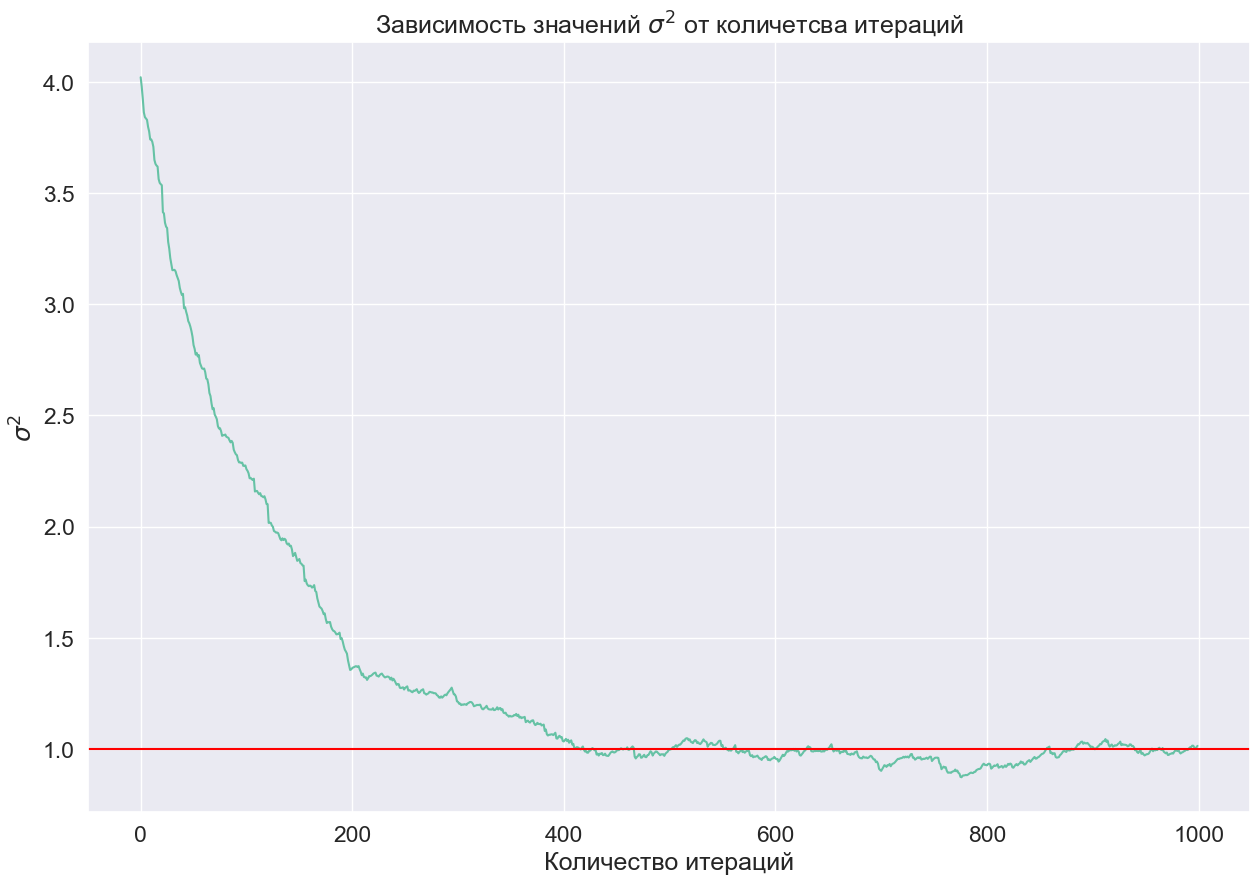

In [136]:
show('$\sigma^2$', new_SGDesc.counts_theta[:, 1])

На данных же графиках видно, что параметры сходятся к истинным значениям, при которых достигается минимум функции. Так и должно было произойти, тк мы взяли несмещенную оценку на дисперсию.

**Вывод:** С помощью градиентного спуска мы смогли решить задачу оптимизации и увидели, что параметры действительно сходятся к своим истинным значениям, прик оторых достигается минимум функции. Также с помощью стохастического градиентного спуска мы заметили, что несмещенность оценки действительно влияет на сходимость, тк смещенная оценка не сошлась к истинному значению, а смещенная - сошлась.

___
## Задача 4.
В заключение вам предлагается реальная практическая задача.

На основе http://ecsocman.hse.ru/data/819/759/1219/Monte_Karlo_dlya_analitikov.pdf
 	
Рассмотрим проект по разработке нефтяного месторождения. В основе модели проекта лежат предварительные данные о величине резервов месторождения.

*Замечание.* Знания физики или экономики не требуются.



*Формулировка задачи от заказчика:*
Общая задача анализа &mdash; основываясь на величине запасов и проценте нефтеотдачи рассчитать NPV (чистая приведенная стоимость) проекта, а точнее, $0.1$-квантиль ее распределения.
Следующим этапом мы хотим использовать ее в качестве критерия оптимизации, то есть максимизировать такое значение NPV, которого мы можем достигнуть или превысить с $90\%$-й вероятностью, подобрав при этом оптимальное количество скважин на месторождении.



Предположим, что на месторождении есть $n$ скважин. Эти скважины добывают некоторую смесь, которая состоит из воды, нефти и различных примесей. Доля нефти из добытого материала называется <a href="https://ru.wikipedia.org/wiki/Нефтеотдача">коэффициентом нефтеотдачи</a> $k$. Мы будем считать, что этот коэффициент является одинаковым для всего месторождения и имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$.




**Добыча нефти скважиной за год**

<a href="http://vseonefti.ru/upstream/stadii-razrabotki.html">Разработка месторождения</a> включает три этапа:
1. фаза роста добычи &mdash; период введения в работу новых скважин;
2. фаза плато: после достижения определенного уровня добычи, она некоторое время продолжается на постоянном уровне;
3. фаза снижения добычи &mdash; период, когда темпы добычи экспоненциально снижаются с течением времени.


Для упрощения задачи мы пропустим два первых этапа и рассмотрим только последний.


Каждая скважина $j$ характеризуется параметром $q_j$ &mdash; темп добычи из скважины, определяемый объемом вещества (смесь нефти, воды и др.), добываемого скважиной за сутки. Будем считать, что этот параметр является одинаковым для скважины в течении всего периода разработки и имеет нормальное распределение со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей. Темпы добычи для разных скважин считаются независимыми случайными величинами.

Соответственно, за год $t$ скважина добывает $Q_{tj} = 365 \cdot k \cdot q_j \cdot e^{-0.008 \cdot n \cdot (t-1)}$ тыс. баррелей нефти, где экспонента отвечает за снижение добычи с течением времени.
Всего за год $t$ на месторождении добывается $Q_t = \sum\limits_{j=1}^{n} Q_{tj}$ тыс. баррелей нефти.




**Прибыль**

Стоимость барреля нефти будем считать постоянной и равной $c = 70$ долларов за баррель. Однако, для расчета стоимости нужно учесть <a href="https://ru.wikipedia.org/wiki/Ставка_дисконтирования">ставку дисконтирования</a> &mdash; процентная ставка, используемая для пересчета будущих потоков доходов в единую величину текущей стоимости (см. формулу далее). Обозначим ее $i$ и будем считать, что она имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$.

Стоимость добытой нефти за год $t$ составит (тыс. баррелей)
$$\frac{c \cdot Q_t}{(1+i)^{t-1}}.$$

Будем считать, что разработка месторождения прекращается, если за год на всем месторождении было добыто менее $100$ тыс. баррелей нефти. Последний год разработки обозначим $T$.




**Затраты**

Затраты на месторождение (кроме скважин) составляют $C_{\text{мест.}} = 200$ млн. долларов в год. Будем считать, что издержки на содержание скважины $j$ за весь период разработки имеют треугольное распределение (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html">scipy.stats.triang</a>) c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. Обозначим эти случайные величины $C^j_{\text{скв.}}$ и будем считать их независимыми.




**NPV**

Теперь мы можем написать формулу NPV
$$NPV = \sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} - T \cdot C_{\text{мест.}} - \sum\limits_{j=1}^{n} C^j_{\text{скв.}}.$$




**Задание**

С помощью метода Монте-Карло требуется найти число $x$, при котором $$\mathsf{P}(NPV < x) = 0.1.$$

Количество итераций метода должно быть не менее $100\ 000$. На основе проделанных итераций оцените также среднее значение NPV и вероятность, с которой NPV будет положительна. Кроме того, постройте нормированную гистограмму значений NPV с помощью `plt.hist(values, bins=200, density=True)`.



Перечислим еще раз все *случайные величины*:
* Коэффициент нефтеотдачи $k$ имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$;
* $q_1, ..., q_{n}$ &mdash; темпы добычи из скважин &mdash; независимые нормальные случайные величины со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей;
* Ставка дисконтирования $i$ имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$;
* $C^1_{\text{скв.}}, ..., C^{n}_{\text{скв.}}$ &mdash; затраты на каждую скважину &mdash; независимые  случайные величины, имеющие треугольное распределение c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов (используйте `sps.triang(loc=90, c=1/3, scale=30)`).

Параметры считать независимыми.

*Фиксированные параметры*:
* $n = 25$ скважин;
* $365$ дней в году;
* $c=70$ долларов за баррель &mdash; стоимость нефти;
* $100$ тыс. баррелей &mdash; объем добытой нефти за год, при котором разработка месторождения прекращается;
* $200$ млн. долларов в год &mdash; затраты на месторождение.

*Замечания по решению*:
* Все случайные величины надо сгенерировать заранее, до вычисления значений $T$.
* Не стоит выводить явную формулу для $T$, используйте цикл по годам.
* Запрещается использовать цикл по количеству элементов в выборке.

**Решение:**

In [58]:
n = 25
t = 365
c = 70
volume = 1e5
cost = 2e8
NPV_ans = []
for i in range(100000):
    k = sps.norm(loc=0.42, scale=0.012).rvs(size=1)
    q = sps.norm(loc=1e4, scale=3e3).rvs(size=n)
    i = sps.norm(loc=0.1, scale=0.012).rvs(size=1)
    C = sps.triang(loc=90, c=1/3, scale=30).rvs(size=n) * 1e6
    count_years = 1
    Q = c * np.sum(365 * k * q * np.exp(-0.008 * n * (count_years - 1)))
    prod_info = [np.array([Q])]
    while Q >= 1e5:
        count_years += 1
        Q = np.sum(365 * k * q * np.exp(-0.008 * n * (count_years - 1)))
        prod_info.append((c * Q) / ((1 + i)**(count_years - 1)))
    prod_info = np.array(prod_info)
    NPV = prod_info.sum() - count_years * cost - C.sum()
    NPV_ans.append(NPV)
NPV_ans = np.array(NPV_ans)

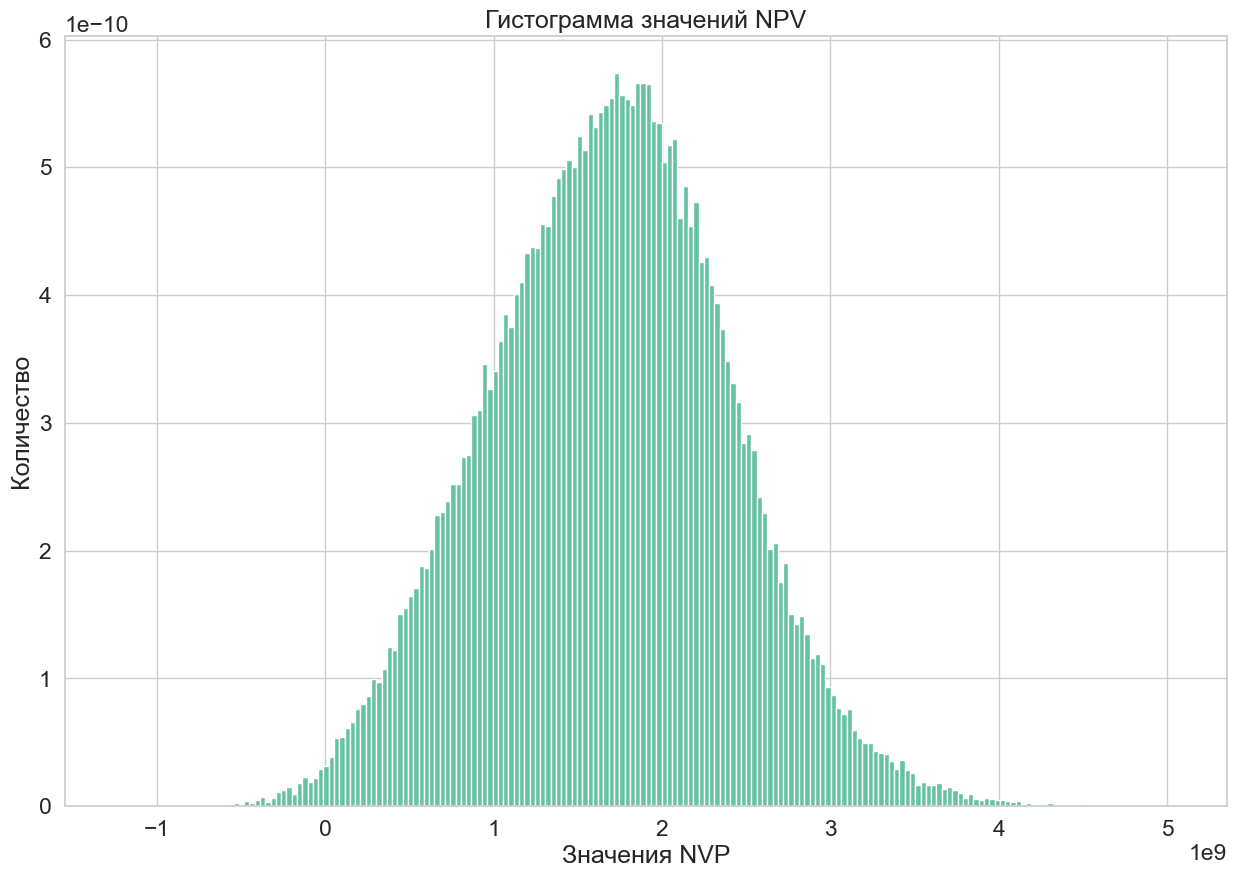

In [67]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15, 10))
plt.hist(NPV_ans, bins=200, density=True)
plt.title('Гистограмма значений NPV')
plt.xlabel('Значения NVP')
plt.ylabel('Количество');

In [72]:
print('Среднее значение NPV:', np.mean(NPV_ans))

Среднее значение NPV: 1681028193.1011755


In [78]:
print('Вероятность, что NPV будет положительна:', len(NPV_ans[NPV_ans > 0]) / len(NPV_ans))

Вероятность, что NPV будет положительна: 0.99332


In [89]:
print('Число x при котором P(NPV < x) = 0.1:', np.quantile(NPV_ans, 0.1))

Число x при котором P(NPV < x) = 0.1: 738637216.0237434


**Вывод:** Мы посчитали значение NPV для 100000 итераций, посчитали вероятность положительного NPV и нашли 0.1 квантиль для NPV, получившееся значение визуально похоже на правду. Также гистограмма NPV похожа на нормальное распределение немного смещенное вправо, это может быть связано с тем, что мы складывали нормальные распределения и треугольное.